<a href="https://colab.research.google.com/github/sallylpez/Telecom-X_Alura/blob/main/Telecom_X_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X, Desafio Alura
Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes (churn) y aún no han identificado la causa raíz de este problema.
Este proyecto tiene como objetivo recopilar, procesar y analizar los datos proporcionados por la empresa para extraer información valiosa que permita al equipo de Data Science desarrollar modelos predictivos y estrategias efectivas para reducir la evasión de clientes.

##📌 EXTRACCIÓN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [22]:
df = pd.read_json(Churn_de_Clientes)
df = pd.DataFrame(df)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🛠️ Preparación de los Datos

In [24]:
df. head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [25]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [26]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4044,5536-SLHPM,Yes,Female,0,Yes,No,55,Yes,Yes,Month-to-month,...,Electronic check,77.75,4458.15,Fiber optic,No,No,Yes,No,No,No
4791,6563-VNPMN,No,Female,1,No,No,45,Yes,No,Month-to-month,...,Bank transfer (automatic),85.70,3778.1,Fiber optic,Yes,Yes,No,Yes,No,No
2360,3295-YVUSR,No,Male,1,No,No,2,Yes,Yes,Month-to-month,...,Mailed check,72.60,154.3,Fiber optic,No,No,No,No,No,No
1361,1965-DDBWU,Yes,Male,0,No,No,16,Yes,Yes,Month-to-month,...,Credit card (automatic),89.05,1448.6,Fiber optic,No,No,No,Yes,No,Yes
4640,6356-ELRKD,Yes,Female,0,No,No,1,Yes,No,Month-to-month,...,Electronic check,95.60,95.6,Fiber optic,Yes,No,No,No,Yes,Yes
95,0151-ONTOV,Yes,Female,0,No,No,1,Yes,No,Month-to-month,...,Mailed check,70.90,70.9,Fiber optic,No,No,No,No,No,No
388,0562-FGDCR,No,Female,0,Yes,Yes,72,Yes,Yes,Two year,...,Mailed check,74.55,5430.65,DSL,Yes,Yes,No,Yes,Yes,No
3707,5118-MUEYH,No,Female,0,Yes,No,48,Yes,Yes,Month-to-month,...,Credit card (automatic),105.10,5083.55,Fiber optic,No,Yes,No,Yes,Yes,Yes
895,1264-BYWMS,Yes,Male,0,No,No,55,Yes,Yes,Month-to-month,...,Electronic check,96.80,5283.95,Fiber optic,No,No,No,No,Yes,Yes
6042,8246-SHFGA,No,Male,0,No,No,17,Yes,No,Month-to-month,...,Credit card (automatic),21.10,385.55,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [28]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [31]:
df.sample(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1137,1612-EOHDH,Yes,Female,0,No,No,1,Yes,No,Month-to-month,...,Electronic check,45.15,45.15,DSL,No,No,No,No,No,No
3106,4324-AHJKS,No,Female,0,No,No,5,Yes,No,Month-to-month,...,Credit card (automatic),55.80,300.4,DSL,Yes,No,Yes,No,No,No
2699,3740-RLMVT,No,Male,1,Yes,No,67,Yes,No,One year,...,Bank transfer (automatic),60.95,4119.4,DSL,Yes,Yes,No,Yes,No,No
2721,3768-NLUBH,Yes,Male,1,Yes,No,57,Yes,Yes,Month-to-month,...,Electronic check,100.60,5746.15,Fiber optic,No,No,Yes,No,Yes,Yes
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,One year,...,Mailed check,55.15,742.9,DSL,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,5590-YRFJT,Yes,Female,0,Yes,No,20,No,No phone service,Month-to-month,...,Electronic check,24.45,482.8,DSL,No,No,No,No,No,No
5615,7665-VIGUD,No,Male,0,No,No,10,Yes,No,One year,...,Mailed check,20.35,176.3,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1934,2737-WFVYW,Yes,Female,0,No,No,2,No,No phone service,Month-to-month,...,Electronic check,45.25,85.5,DSL,No,No,No,No,Yes,Yes
4289,5897-ZYEKH,No,Female,1,Yes,No,67,Yes,Yes,One year,...,Electronic check,105.60,7112.15,Fiber optic,Yes,Yes,No,No,Yes,Yes


In [32]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


In [33]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [41]:
df['ChargesTotal'] = pd.to_numeric(df['ChargesTotal'], errors='coerce')

In [42]:

df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [36]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [44]:
df['DailyCharges'] = df['ChargesMonthly'] / 30


In [46]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
4447,6097-EQISJ,Yes,Female,0,Yes,Yes,66,Yes,Yes,One year,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,6615.15,102.45,3.415000
1067,1494-EJZDW,No,Female,0,Yes,Yes,10,Yes,No,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,220.80,20.15,0.671667
5005,6848-HJTXY,No,Female,0,Yes,No,64,Yes,No,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1208.60,19.45,0.648333
4946,6750-FCEKS,,Male,0,No,No,2,No,No phone service,Month-to-month,...,DSL,No,No,No,Yes,No,No,75.60,29.85,0.995000
1877,2668-TZSPS,No,Male,0,No,No,1,Yes,No,Month-to-month,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,20.45,20.45,0.681667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,8285-ABVLB,No,Female,0,Yes,No,70,Yes,No,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1328.35,19.85,0.661667
368,0530-HBKHZ,,Female,1,Yes,No,1,No,No phone service,Month-to-month,...,DSL,No,No,No,No,No,No,24.80,24.80,0.826667
793,1121-QSIVB,No,Female,0,No,Yes,44,Yes,Yes,One year,...,DSL,No,Yes,No,No,Yes,Yes,3471.10,77.55,2.585000
6098,8332-OSJDW,No,Male,0,Yes,Yes,12,Yes,Yes,One year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,314.95,26.40,0.880000


In [47]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [48]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [49]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [50]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [51]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)

    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [53]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


In [54]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [56]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [58]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [59]:
df.to_json('Churn_de_Clientes.json', index= False)

In [60]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

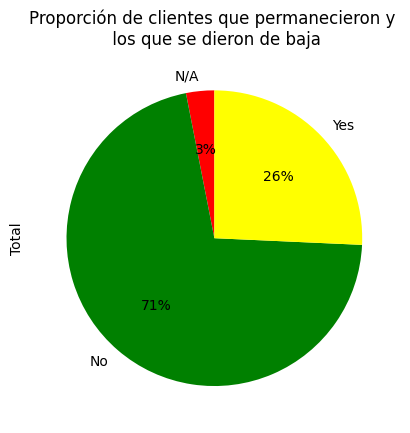

<Figure size 640x480 with 0 Axes>

In [62]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'green','yellow'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')